# STEAM VIDEO GAMES RECOMMENDATION SYSTEM

we need to recommend the similar games to the user based on their behaviour

#About dataset
This dataset is a list of user behaviors, with columns: user-id, game-title, behavior-name, value. The behaviors included are 'purchase' and 'play'. The value indicates the degree to which the behavior was performed - in the case of 'purchase' the value is always 1, and in the case of 'play' the value represents the number of hours the user has played the game.

steam-200k - (199999, 5)

# Columns in dataset
user-id

game-title

behavior-name

value

0

In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
# import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# Read csv file using pandas
data=pd.read_csv('steam-200k.csv')
data

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


# EDA

In [4]:
# remane the column name as games user_id, hoursplay and status
data=data.rename(columns={'The Elder Scrolls V Skyrim':'games'})
data=data.rename(columns={'purchase':'Status'})
data=data.rename(columns={'1.0':'Hoursplay'})
data=data.rename(columns={'151603712':'User_ID'})
data

,User_ID,games,Status,Hoursplay,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


In [5]:
#drop 0 column
data=data.drop(columns=['0'])
data.head()

,User_ID,games,Status,Hoursplay
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9


In [6]:
#drop duplicate user_id and games keep the last one
data=data.drop_duplicates(['User_ID','games'],keep='last')

In [7]:
#check the shape of the dataset
data.shape

(128804, 4)

In [8]:
#check columns of the dataset
data.columns

Index(['User_ID', 'games', 'Status', 'Hoursplay'], dtype='object')

In [9]:
# Check which columns are having categorical, numerical or boolean values of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128804 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User_ID    128804 non-null  int64  
 1   games      128804 non-null  object 
 2   Status     128804 non-null  object 
 3   Hoursplay  128804 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ MB


In [10]:
# Check for missing values in all the columnns of the train_dataset
data.isnull().sum()

User_ID      0
games        0
Status       0
Hoursplay    0
dtype: int64

In [11]:
# get how many unique values are in games column of dataset
data['games'].value_counts()

Dota 2                              4841
Team Fortress 2                     2323
Unturned                            1563
Counter-Strike Global Offensive     1412
Half-Life 2 Lost Coast               981
                                    ... 
iBomber Attack                         1
The Dreamatorium of Dr. Magnus 2       1
Verde Station                          1
TRIP Steam Edition                     1
Executive Assault                      1
Name: games, Length: 5155, dtype: int64

In [13]:
# get the total count of play and total count of purchase
total_purchase=data.groupby('Status')['Status'].agg('count')
total_purchase

Status
play        70205
purchase    58599
Name: Status, dtype: int64

In [14]:
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
data.describe()

,User_ID,Hoursplay
count,1.288040e+05,128804.000000
mean,1.025343e+08,27.150648
std,7.242875e+07,171.276192
min,5.250000e+03,0.100000
25%,4.559264e+07,1.000000
50%,8.605570e+07,1.000000
75%,1.542307e+08,5.700000
max,3.099031e+08,11754.000000


## visualizing data

array([[<AxesSubplot: title={'center': 'User_ID'}>,
        <AxesSubplot: title={'center': 'Hoursplay'}>]], dtype=object)

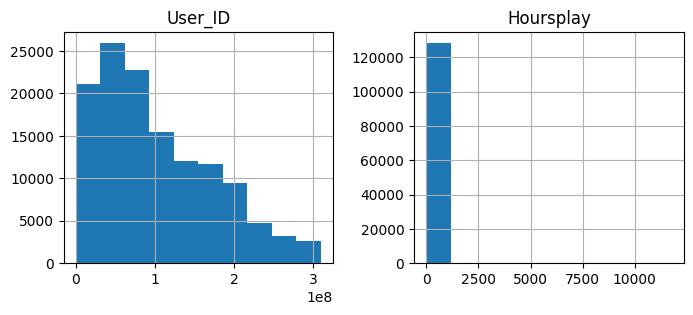

In [17]:
# Histogram using pandas 
data.hist(figsize=(8,3))

Text(0.5, 1.0, 'Status column frequency')

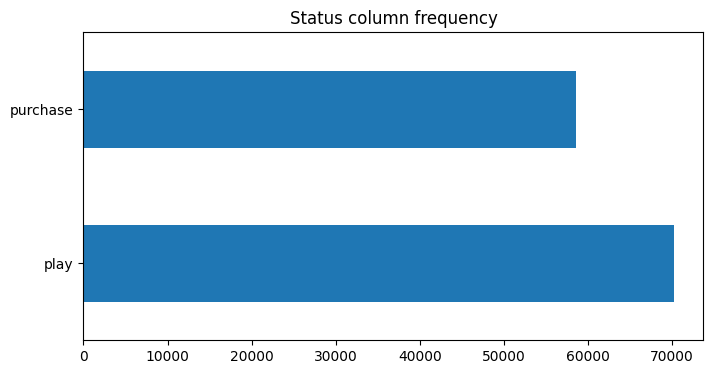

In [22]:
# plot a horizontal bar plot of column status
data['Status'].value_counts().plot.barh(figsize=(8,4)).set_title('Status column frequency')


<AxesSubplot: >

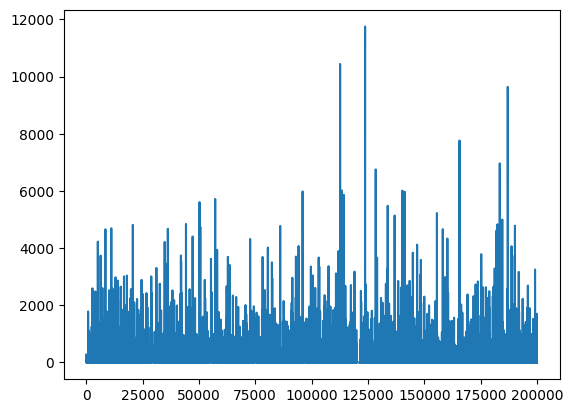

In [19]:
#plot a count plot of hoursplay column
data['Hoursplay'].plot()

<AxesSubplot: >

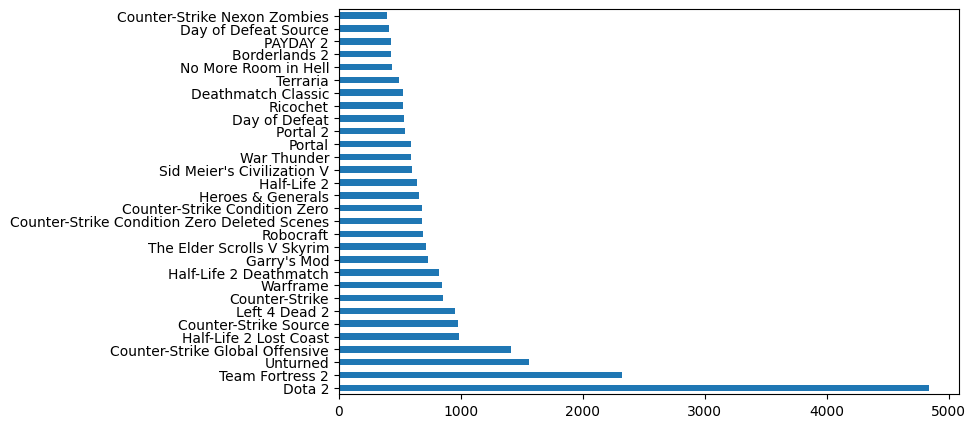

In [21]:
# plot a horizontal bar plot of games column for top 30 games
data['games'].value_counts().head(30).plot(kind='barh',figsize=(8,5))

<AxesSubplot: xlabel='Status', ylabel='Hoursplay'>

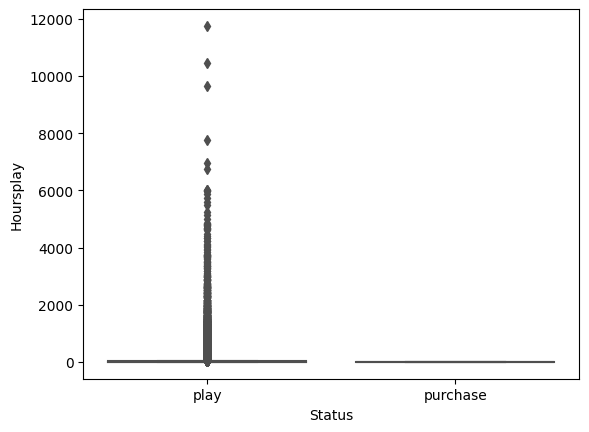

In [23]:
# plot a boxplot of status as x-axis and hoursplay as y-axis
sns.boxplot(x='Status',y='Hoursplay',data=data,palette='rainbow')

# converting hours to rating

In [24]:
# comvert the hoursplay into rating
data = data[(data['Hoursplay']>=2) & (data['Status']=='play')]
data_filtered = data[data.groupby('games').User_ID.transform(len)>=20]
data_filtered['games'].nunique()
data_filtered.head(20)
data_filtered['User_ID']=data_filtered['User_ID'].astype(str)
averages = data_filtered.groupby(['games'],as_index=False).Hoursplay.mean()
averages['avg_Hoursplay'] = averages['Hoursplay']
averages.drop('Hoursplay',axis=1,inplace=True)
final_rating = pd.merge(data_filtered,averages[['games','avg_Hoursplay']],on='games')
conditions=[
    (final_rating['Hoursplay']>=0.8*final_rating['avg_Hoursplay']),
    (final_rating['Hoursplay']>=0.6*final_rating['avg_Hoursplay'])&(final_rating['Hoursplay']<0.8*final_rating['avg_Hoursplay']),
    (final_rating['Hoursplay']>=0.4*final_rating['avg_Hoursplay'])&(final_rating['Hoursplay']<0.6*final_rating['avg_Hoursplay']),
    (final_rating['Hoursplay']>=0.2*final_rating['avg_Hoursplay'])&(final_rating['Hoursplay']<0.4*final_rating['avg_Hoursplay']),
    final_rating['Hoursplay']>=0,
]
values=[5,4,3,2,1]
final_rating['rating'] = np.select(conditions,values)
final_rating

C:\Users\HP\AppData\Local\Temp\ipykernel_10112\1469602157.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['User_ID']=data_filtered['User_ID'].astype(str)


,User_ID,games,Status,Hoursplay,avg_Hoursplay,rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,5
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792,3
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792,5
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792,5
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792,5
...,...,...,...,...,...,...
36415,51822361,"Warhammer 40,000 Dawn of War Soulstorm",play,23.0,14.109091,5
36416,38317154,"Warhammer 40,000 Dawn of War Soulstorm",play,5.5,14.109091,2
36417,36404933,"Warhammer 40,000 Dawn of War Soulstorm",play,5.8,14.109091,3
36418,87201181,"Warhammer 40,000 Dawn of War Soulstorm",play,24.0,14.109091,5


In [25]:
# keep only important columns( user_id, games,rating ) drop everthing else 
final_rating = final_rating.drop(['Status','Hoursplay','avg_Hoursplay'],axis=1)
final_rating

,User_ID,games,rating
0,151603712,The Elder Scrolls V Skyrim,5
1,59945701,The Elder Scrolls V Skyrim,3
2,92107940,The Elder Scrolls V Skyrim,5
3,250006052,The Elder Scrolls V Skyrim,5
4,11373749,The Elder Scrolls V Skyrim,5
...,...,...,...
36415,51822361,"Warhammer 40,000 Dawn of War Soulstorm",5
36416,38317154,"Warhammer 40,000 Dawn of War Soulstorm",2
36417,36404933,"Warhammer 40,000 Dawn of War Soulstorm",3
36418,87201181,"Warhammer 40,000 Dawn of War Soulstorm",5


# MEMORY BASED COLLABORATIVE FILTERING

Memory-based algorithms approach the collaborative filtering problem by using the entire database.It tries to find users that are similar to the active user (i.e. the users we want to make predictions for), and uses their preferences to predict ratings for the active user.

In [26]:
#import pairwise_distances, cosine, corelation
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [28]:
# create pivot table containing user_id as index, games as columns, ratings as values
piv = final_rating.pivot_table(index=['User_ID'],columns=['games'],values='rating')


In [29]:
#check shape of pivot table
print(piv.shape)
#check first five rows of pivot table
piv.head()

(8309, 427)


games,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
User_ID,,,,,,,,,,,,,,,,,,,,,
100053304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100057229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100070732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100096071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100168166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
## Note: As we are subtracting the mean from each rating to standardize
##all users with only one rating or who had rated everything the same will be dropped
# Normalize the values in pivot table
piv_norm = piv.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)),axis=1)


# Drop all columns containing only zeros representing users who did not rate
piv_norm.fillna(0,inplace=True)
piv_norm =piv_norm.T
piv_norm =piv_norm.loc[:,(piv_norm !=0).any(axis=0)]

In [32]:
# import scipy, operator
import scipy as sp
import operator
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
# convert the data into sparse matrix format to be read by the following functions
piv_sparse = sp.sparse.csr_matrix(piv_norm.values)


In [34]:
# create matrices to show the computed cosine similarity values between each user/user array pair and item/item array pair.
item_similarity = cosine_similarity(piv_sparse)

user_similarity = cosine_similarity(piv_sparse.T)

In [36]:
# Inserting the similarity matricies into dataframe objects
item_sim_df = pd.DataFrame(item_similarity,index=piv_norm.index,columns=piv_norm.index)
#item similarity dataframe

#user similarity dataframe
user_sim_df = pd.DataFrame(user_similarity,index=piv_norm.columns,columns=piv_norm.columns)


In [37]:
# write a function which will return the top 10 games with the highest cosine similarity value
def top_game(game):
    count = 1
    print('Similar game to {} include:\n '.format(game))
    for item in item_sim_df.sort_values(by= game,ascending=False).index[1:11]:
        print('No. {}: {}'.format(count,item)) 
        count += 1

In [38]:
top_game('Aftermath')

Similar game to Aftermath include:
 
No. 1: Alice Madness Returns
No. 2: Shadow Warrior
No. 3: Brtal Legend
No. 4: Resident Evil 5 / Biohazard 5
No. 5: Infestation Survivor Stories
No. 6: Call of Juarez Gunslinger
No. 7: The Walking Dead Season Two
No. 8: Counter-Strike Nexon Zombies
No. 9: Star Conflict
No. 10: L.A. Noire


In [39]:
# check the column of pivot table
piv_norm.columns

Index(['100057229', '100096071', '100311267', '100322840', '100351493',
       '100359523', '100431715', '100444456', '100519466', '100630947',
       ...
       '994489', '9946133', '99484728', '99640715', '99704390', '99711581',
       '99713453', '99723205', '99766416', '99802512'],
      dtype='object', name='User_ID', length=3056)

In [40]:
# write a function which will return the top 5 users with the highest similarity value 
def top_users(user):
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    print('Most similar usera:\n')
    sim_values = user_sim_df.sort_values(by=user,ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user,ascending=False).index[1:11]
    zipped = zip(sim_users,sim_values)
    for user,sim in zipped:
        print('User #{0}, Similarity values: {1:.2f}'.format(user,sim))



In [42]:
top_users('99484728')

Most similar usera:

User #40289887, Similarity values: 0.73
User #185494712, Similarity values: 0.71
User #16710264, Similarity values: 0.71
User #20566124, Similarity values: 0.67
User #49769103, Similarity values: 0.67
User #15702351, Similarity values: 0.65
User #161139120, Similarity values: 0.59
User #202057920, Similarity values: 0.58
User #57271785, Similarity values: 0.58
User #33993318, Similarity values: 0.58


In [55]:
# write a function which constructs a list of lists containing the highest rated games per similar user
# and returns the name of the game along with the frequency it appears in the list
def similar_user_recs(user):
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    sim_users = user_sim_df.sort_values(by=user,ascending=False).index[1:11]
    best=[]
    most_common={}
    for i in sim_users:
        max_score= piv_norm.loc[:,i].max()
    best.append(piv_norm[piv_norm.loc[:,i]==max_score].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] +=1
            else:
                most_common[j] =1
    sorted_list = sorted(most_common.items(),key=operator.itemgetter(1),reverse=True)
    return sorted_list[:5]

In [56]:
similar_user_recs('100519466')


[('Robocraft', 1)]

# COLLABORATIVE FILTERING USING KNN

Collaborative Filtering Using k-Nearest Neighbors (kNN). kNN is a machine learning algorithm to find clusters of similar users based on common ratings, and make predictions using the average rating of top-k nearest neighbors.

https://datascienceplus.com/building-a-book-recommender-system-the-basics-knn-and-matrix-factorization/

In [57]:
# import NearestNeighbors
from sklearn.neighbors import  NearestNeighbors
#make an object for the NearestNeighbors Class.
model_knn = NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=20,n_jobs=-1)
# fit the dataset
model_knn.fit(piv_norm)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)


Test model and make some recommendations:

In [62]:
# choose random game
query_index=np.random.choice(piv_norm.shape[0])
# print the name of random game
print('Choosen game is: ',piv_norm.index[query_index])

# use kNN algorithm to measures distance to determine the closeness of instances.
distances,indices = model_knn.kneighbors(piv_norm.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

# pick most popular games among the neighbors and print their names
for i in range(0,len(distances.flatten())):
    if i == 0:
        print('Recommendations for {}: \n'.format(piv_norm.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i,piv_norm.index[indices.flatten()[i]],distances.flatten()[i]))

Choosen game is:  Rocket League
Recommendations for Rocket League: 

1: Batman Arkham Origins, with distance of 0.9057328702328387:
2: DiRT 2, with distance of 0.9069995369482811:
3: Grand Theft Auto IV, with distance of 0.9190749977128095:
4: Battlefield Bad Company 2, with distance of 0.9260218729643377:
5: Scribblenauts Unlimited, with distance of 0.9289358897274886:


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


#Conclusion

We can use different different methods based on our problem statement and dataset. Here we used collaborative filtering technique to recommend games.We can use this method to recommend alot of other things as well such as music, movies, books, news etc. 

#Congratulation for completing the assignment.
You have learned a lot while doing this assignment.

